In [1]:
import torch
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

/home/jasonah/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
depth_pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf")
image = Image.open("/home/jasonah/data/road/frame000350.png")

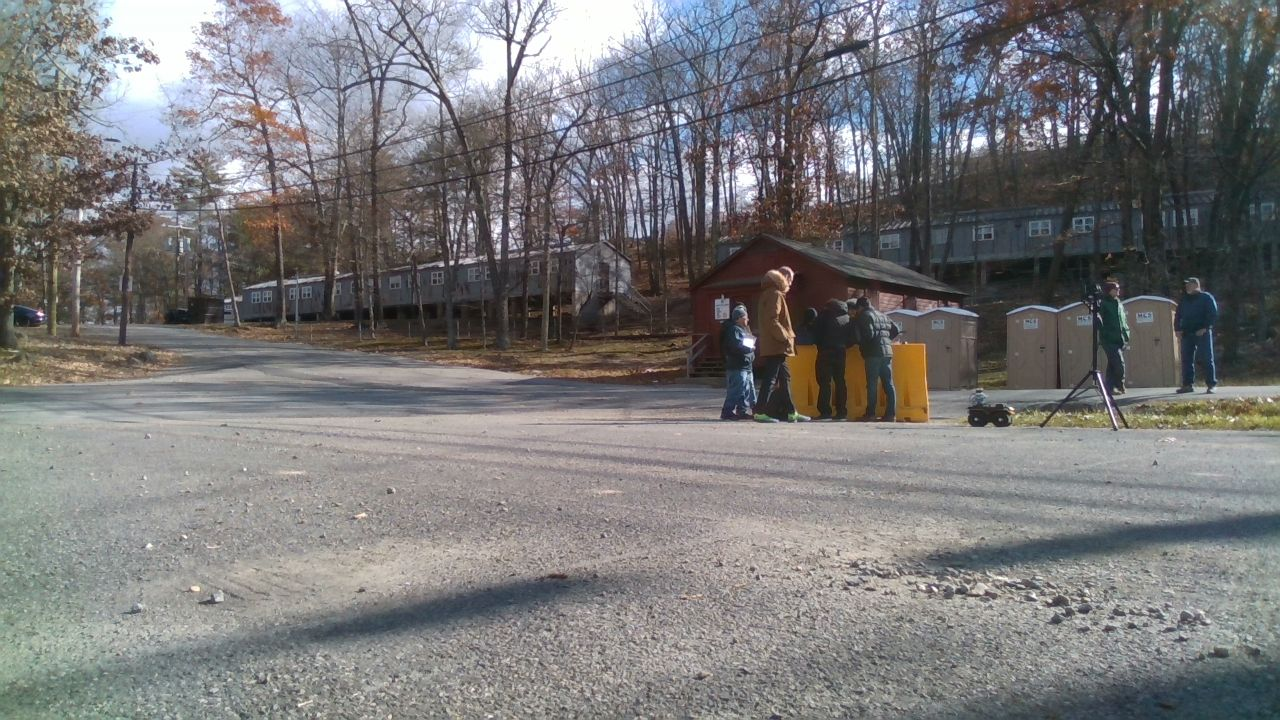

In [3]:
image

In [4]:
depth = depth_pipe(image)

In [5]:
depth_img = np.array(depth['depth'])


In [6]:
def remove_zeros(arr):
    return arr[arr != 0]

In [7]:
print("SHAPE: ", depth_img.shape)

SHAPE:  (720, 1280)


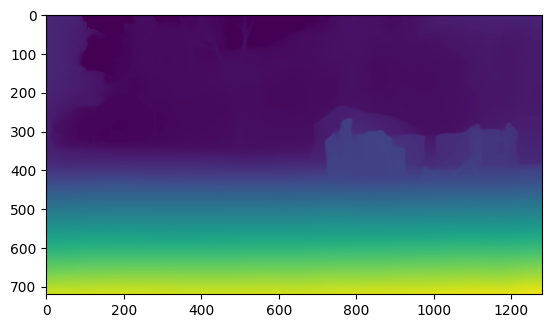

In [8]:
plt.imshow(depth_img)

In [9]:
def diff(arr: np.ndarray, over=1) -> np.ndarray:
    out = np.zeros((len(arr)-over,1))
    for i in range(0,len(arr)-over):
        out[i] = arr[i] - arr[i+over]
        if out[i] == 255: out[i] = 0

    return out

/tmp/ipykernel_67/1887666036.py:4: RuntimeWarning: overflow encountered in scalar subtract
  out[i] = arr[i] - arr[i+over]


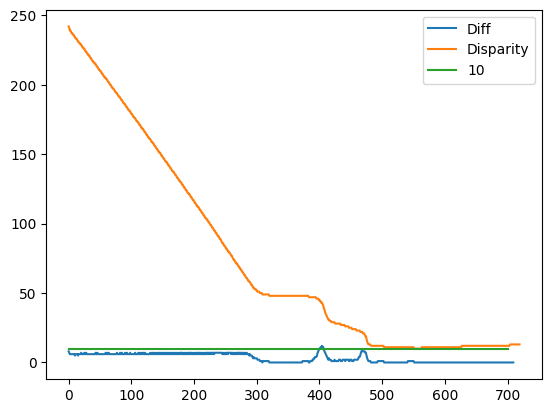

In [16]:
%matplotlib inline
#for i in range(0,depth_img.shape[1],1000):
#    col = remove_zeros(depth_img.T[i])
#    plt.plot(np.arange(len(col)), col)
over = 10
col = np.flip(depth_img.T[800])
plt.plot(np.arange(len(col)-over),diff(col, over=over))
plt.plot(np.arange(len(col)), col)
plt.plot([0,700],[10,10])
plt.legend(['Diff', 'Disparity', '10'])

/tmp/ipykernel_67/1887666036.py:4: RuntimeWarning: overflow encountered in scalar subtract
  out[i] = arr[i] - arr[i+over]


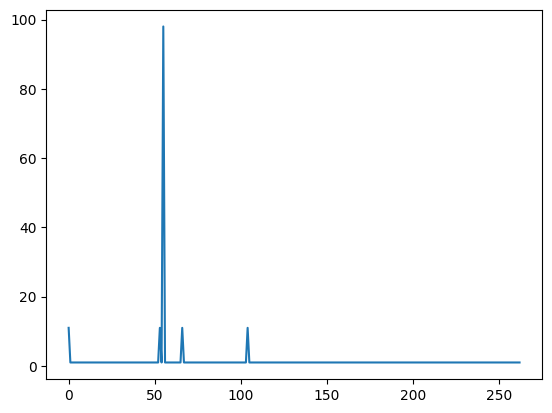

In [17]:
col_diff = diff(col,over=over)
w = np.where(col_diff==0)[0]
plt.plot(np.arange(len(w)-1),-1*diff(w,over=1))

In [18]:
print(w)

[309 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336
 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354
 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372
 383 384 482 483 484 485 486 487 488 489 490 491 492 503 504 505 506 507
 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525
 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 551 552 553
 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571
 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589
 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607
 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625
 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643
 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661
 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679
 680 681 682 683 684 685 686 687 688 689 690 691 69

In [19]:
threshold = 10 #pixels
obs = w[np.where(-1*diff(w,over=1) > threshold)[0]]

In [20]:
print("Objects at: ", obs)

Objects at:  [309 372 384 492 540]


/tmp/ipykernel_67/1887666036.py:4: RuntimeWarning: overflow encountered in scalar subtract
  out[i] = arr[i] - arr[i+over]


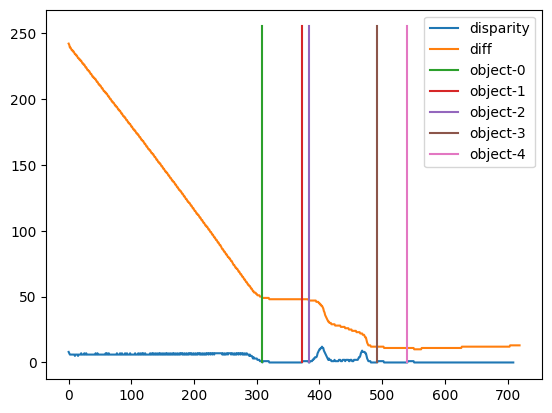

In [21]:
plt.plot(np.arange(len(col)-over),diff(col, over=over))
plt.plot(np.arange(len(col)), col)
lgnd = ["disparity", "diff"]
for i,obj in enumerate(obs):
    plt.plot([obj,obj],[0,255])
    lgnd.append("object-%s"%i)
plt.legend(lgnd)